In [75]:
# Necessary Libraries
import pandas as pd
import yfinance as yf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta
from ta.utils import dropna
from ta.volatility import BollingerBands

In [89]:
# Download historical data for a specific stock
stock_ticker = 'AAPL'
df = yf.download(stock_ticker, start='2015-01-01', end='2020-01-01')

# Save the data as a CSV file
df.to_csv(f'{stock_ticker}_data.csv', index=False)

stock_ticker = 'GOOGL'
df = yf.download(stock_ticker, start='2015-01-01', end='2020-01-01')

# Save the data as a CSV file
df.to_csv(f'{stock_ticker}_data.csv', index=False)

stock_ticker = 'META'
df = yf.download(stock_ticker, start='2015-01-01', end='2020-01-01')

# Save the data as a CSV file
df.to_csv(f'{stock_ticker}_data.csv', index=False)

stock_ticker = 'IBM'
df = yf.download(stock_ticker, start='2015-01-01', end='2020-01-01')

# Save the data as a CSV file
df.to_csv(f'{stock_ticker}_data.csv', index=False)

stock_ticker = 'V'
df = yf.download(stock_ticker, start='2015-01-01', end='2020-01-01')

# Save the data as a CSV file
df.to_csv(f'{stock_ticker}_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [90]:
# Load the data from the CSV file
df1 = pd.read_csv('AAPL_data.csv')
df2 = pd.read_csv('GOOGL_data.csv')
df3 = pd.read_csv('META_data.csv')
df4 = pd.read_csv('IBM_data.csv')
df5 = pd.read_csv('V_data.csv')

frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)


# Adding Bollinger Bands as columns to the dataframe, with a 20-day moving average and a 20-day SD
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=20)
# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()
df['bb_bbm'].fillna(value=df['bb_bbm'].mean(), inplace=True)
df['bb_bbh'].fillna(value=df['bb_bbh'].mean(), inplace=True)
df['bb_bbl'].fillna(value=df['bb_bbl'].mean(), inplace=True)
# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

#MACD implementation
indicatorMACD = ta.trend.MACD(close=df["Close"], window_slow=12, window_fast=26, window_sign=9, fillna=True)
df['macd'] = indicatorMACD.macd()
df['macdDiff'] = indicatorMACD.macd_diff()
df['macdSign'] = indicatorMACD.macd_signal()

#RSI
#df = ta.add_all_ta_features(df, "Close", rsi=True, rsi_period=14)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Convert the data into a time series format
def create_time_series(df_scaled, lookback):
    X, Y = [], []
    for i in range(len(df_scaled) - lookback - 1):
        a = df_scaled[i:(i + lookback), :]
        X.append(a)
        Y.append(df_scaled[i + lookback, :])
    return np.array(X), np.array(Y)

lookback = 30
X, Y = create_time_series(df_scaled, lookback)

In [91]:
df.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
bb_bbm       0
bb_bbh       0
bb_bbl       0
bb_bbhi      0
bb_bbli      0
macd         0
macdDiff     0
macdSign     0
dtype: int64

In [92]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100))
model.add(Dense(units=Y.shape[1]))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [93]:
# Train the model on the data
model.fit(X, Y, epochs=100, batch_size=32)

Epoch 1/100
196/196 [==============================] - 7s 23ms/step - loss: 0.0053
Epoch 2/100
196/196 [==============================] - 4s 22ms/step - loss: 8.8346e-04
Epoch 3/100
196/196 [==============================] - 5s 23ms/step - loss: 6.3120e-04
Epoch 4/100
196/196 [==============================] - 5s 23ms/step - loss: 4.9882e-04
Epoch 5/100
196/196 [==============================] - 5s 23ms/step - loss: 4.0846e-04
Epoch 6/100
196/196 [==============================] - 5s 24ms/step - loss: 3.6685e-04
Epoch 7/100
196/196 [==============================] - 5s 24ms/step - loss: 3.3619e-04
Epoch 8/100
196/196 [==============================] - 5s 24ms/step - loss: 3.0525e-04
Epoch 9/100
196/196 [==============================] - 5s 23ms/step - loss: 2.8932e-04
Epoch 10/100
196/196 [==============================] - 5s 23ms/step - loss: 2.6468e-04
Epoch 11/100
196/196 [==============================] - 5s 23ms/step - loss: 2.5858e-04
Epoch 12/100
196/196 [=======================

196/196 [==============================] - 5s 24ms/step - loss: 1.7123e-04
Epoch 95/100
196/196 [==============================] - 5s 26ms/step - loss: 1.6803e-04
Epoch 96/100
196/196 [==============================] - 5s 27ms/step - loss: 1.7480e-04
Epoch 97/100
196/196 [==============================] - 5s 26ms/step - loss: 1.6819e-04
Epoch 98/100
196/196 [==============================] - 5s 25ms/step - loss: 1.7025e-04
Epoch 99/100
196/196 [==============================] - 5s 25ms/step - loss: 1.7138e-04
Epoch 100/100
196/196 [==============================] - 6s 31ms/step - loss: 1.7624e-04


In [94]:
# Evaluate the model on the validation data
Y_pred = model.predict(X)
#print(Y_pred)

# Calculate the mean squared error between the predicted and actual stock prices
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Y_pred)
print('Mean Squared Error:', mse)


196/196 [==============================] - 3s 10ms/step
Mean Squared Error: 0.0001683489141334536


[*********************100%***********************]  1 of 1 completed
39/39 [==============================] - 0s 11ms/step
Mean Squared Error: 313.11286461407576


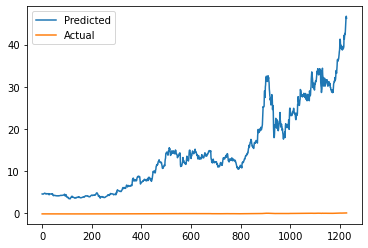

In [95]:
# Download historical data for a specific stock
stock_ticker = 'AMD'
df = yf.download(stock_ticker, start='2015-01-01', end='2020-01-01')

# Save the data as a CSV file
df.to_csv(f'{stock_ticker}_data.csv', index=False)

# Load the new data
df_new = pd.read_csv('AMD_data.csv')

# Calculate the new moving averages for the close price
#df_new['sma_50'] = df_new['Close'].rolling(window=50).mean()
#df_new['sma_100'] = df_new['Close'].rolling(window=100).mean()
#df_new['sma_150'] = df_new['Close'].rolling(window=150).mean()
#df_new['sma_200'] = df_new['Close'].rolling(window=200).mean()



#df_new['sma_50'].fillna(value=df_new['sma_50'].mean(), inplace=True)
#df_new['sma_100'].fillna(value=df_new['sma_100'].mean(), inplace=True)
#df_new['sma_150'].fillna(value=df_new['sma_150'].mean(), inplace=True)
#df_new['sma_200'].fillna(value=df_new['sma_200'].mean(), inplace=True)

# Adding Bollinger Bands as columns to the dataframe, with a 20-day moving average and a 20-day SD
indicator_bb = BollingerBands(close=df_new["Close"], window=20, window_dev=20)
# Add Bollinger Bands features
df_new['bb_bbm'] = indicator_bb.bollinger_mavg()
df_new['bb_bbh'] = indicator_bb.bollinger_hband()
df_new['bb_bbl'] = indicator_bb.bollinger_lband()
df_new['bb_bbm'].fillna(value=df_new['bb_bbm'].mean(), inplace=True)
df_new['bb_bbh'].fillna(value=df_new['bb_bbh'].mean(), inplace=True)
df_new['bb_bbl'].fillna(value=df_new['bb_bbl'].mean(), inplace=True)
# Add Bollinger Band high indicator
df_new['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
# Add Bollinger Band low indicator
df_new['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

indicatorMACD = ta.trend.MACD(close=df_new["Close"], window_slow=12, window_fast=26, window_sign=9, fillna=True)
df_new['macd'] = indicatorMACD.macd()
df_new['macdDiff'] = indicatorMACD.macd_diff()
df_new['macdSign'] = indicatorMACD.macd_signal()


# Normalize the new data using the same MinMaxScaler used for the training data
df_new_scaled = scaler.transform(df_new)

# Convert the new data into a time series format
X_new, Y_new = create_time_series(df_new_scaled, lookback)

# Use the trained model to make predictions on the new data
predictions = model.predict(X_new)

# Denormalize the predictions using the same MinMaxScaler used for the training data
predictions = scaler.inverse_transform(predictions)

# Calculate the mean squared error between the predicted and actual close prices
mse = np.mean((predictions[:, 0] - Y_new[:, 0])**2)
print('Mean Squared Error:', mse)

plt.plot(predictions[:, 0], label='Predicted')
plt.plot(Y_new[:, 0], label='Actual')
plt.legend()
plt.show()